In [1]:
print("Hello world")

Hello world


In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


# MODEL

## Installing Dependencies

In [3]:
# 🔧 Step 1: Install Dependencies
# ------------------------------
!pip install -q ultralytics tensorflow opencv-python-headless tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.2 MB/s eta 0:00:00


In [4]:
# ------------------------------
# 🧠 Step 2: Import Libraries
# ------------------------------
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import os
import pandas as pd
from tqdm import tqdm
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Download Dataset from Kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajpaswan","key":"db22a7c165902d9e91ed0ffc0a489df2"}'}

In [6]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!pip install -q kaggle

In [8]:
!kaggle datasets download -d manishlearning/40-yoga-poses-dataset

Dataset URL: https://www.kaggle.com/datasets/manishlearning/40-yoga-poses-dataset
License(s): CC0-1.0
 96% 667M/692M [00:02<00:00, 212MB/s]
100% 692M/692M [00:02<00:00, 278MB/s]


In [9]:
!unzip 40-yoga-poses-dataset.zip

Archive:  40-yoga-poses-dataset.zip
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000001.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000002.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000003.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000004.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000005.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000006.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000007.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000008.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000009.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000010.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000011.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000012.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000013.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000014.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000015.png  
  inflating: Yoga D

## Dataset checking

<ipython-input-10-34ebc9951792>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Class', data=label_counts_df, palette='cool')


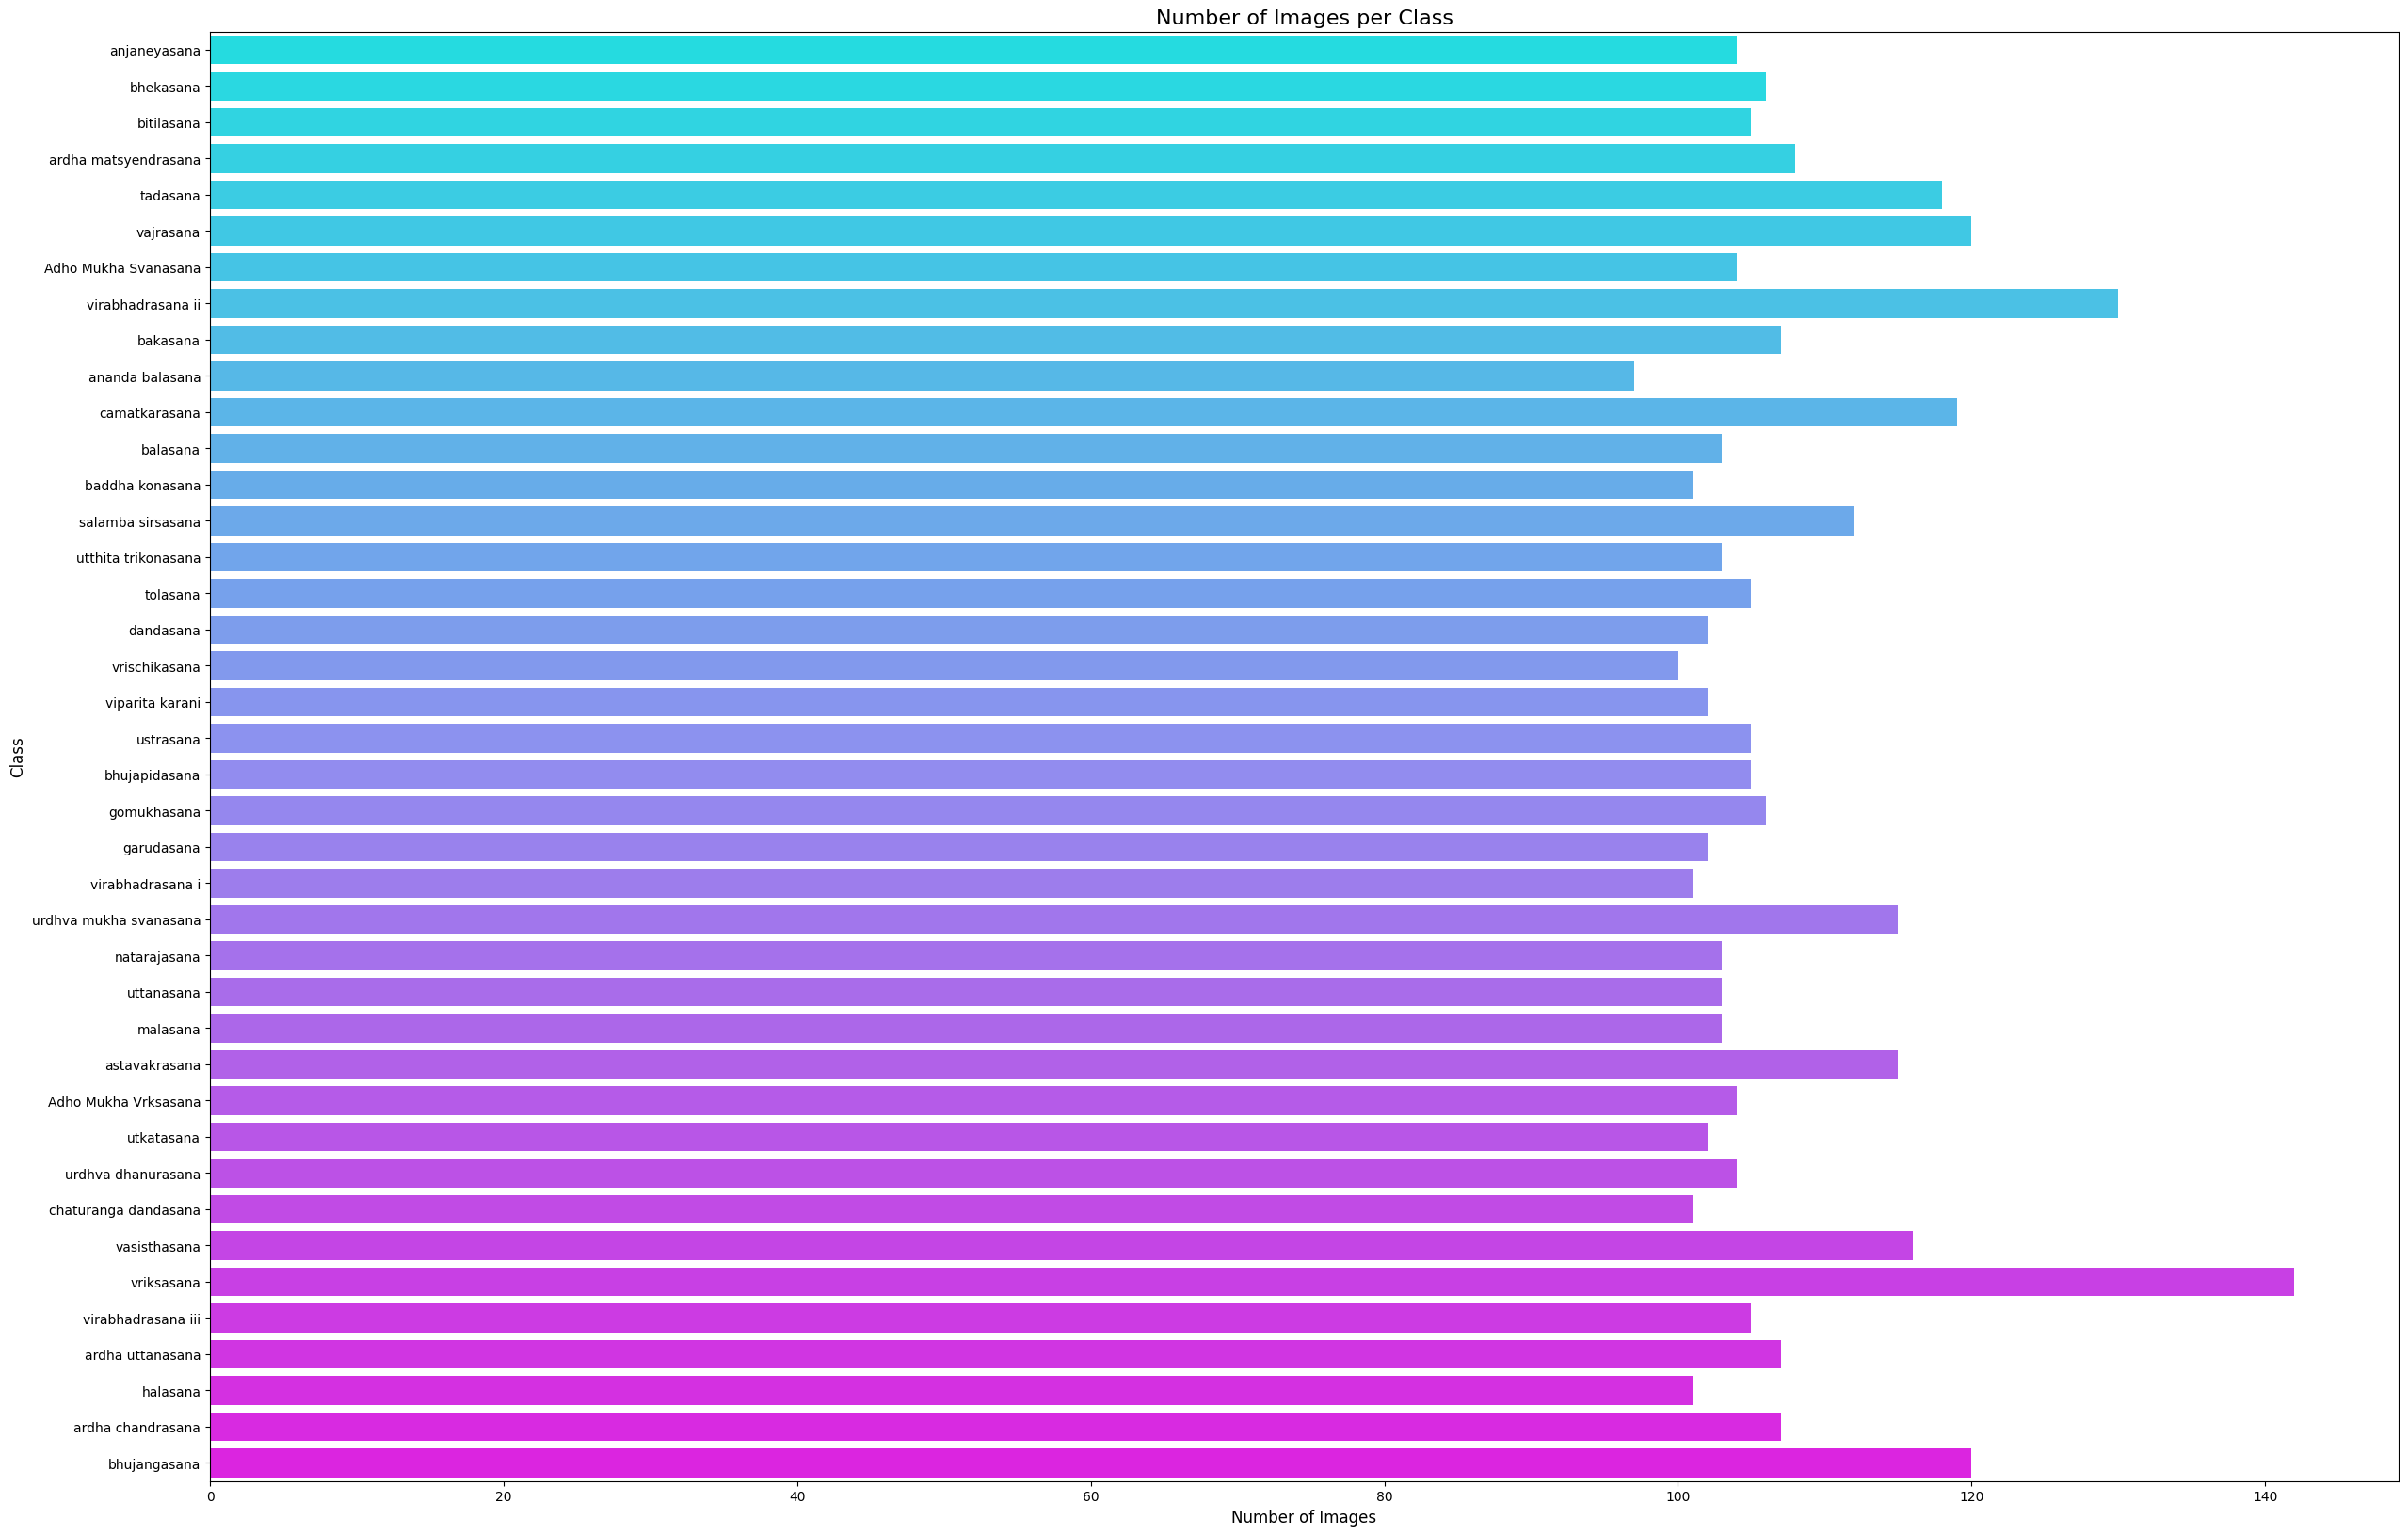

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import random
from collections import Counter
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.applications import VGG16, imagenet_utils
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

image_path = 'Yoga Dataset_40'

# Get the list of all subdirectories (classes)
classes = os.listdir(image_path)

# Initialize an empty list to store labels
labels = []

# Loop through each class and get the number of images in each class
for class_name in classes:
    class_dir = os.path.join(image_path, class_name)
    if os.path.isdir(class_dir):  # Ensure it's a directory
        num_images = len(os.listdir(class_dir))  # Count number of images in each class
        labels.extend([class_name] * num_images)  # Append the class label for each image

# Count the number of images per class
label_counts = Counter(labels)

# Convert the label counts into a DataFrame for seaborn

label_counts_df = pd.DataFrame(list(label_counts.items()), columns=['Class', 'Count'])

# Create the seaborn barplot
plt.figure(figsize=(30,20))
sns.barplot(x='Count', y='Class', data=label_counts_df, palette='cool')

# Add title and labels
plt.title('Number of Images per Class', fontsize=16)
plt.xlabel('Number of Images', fontsize=12)
plt.ylabel('Class', fontsize=12)

# Show the plot
plt.show()

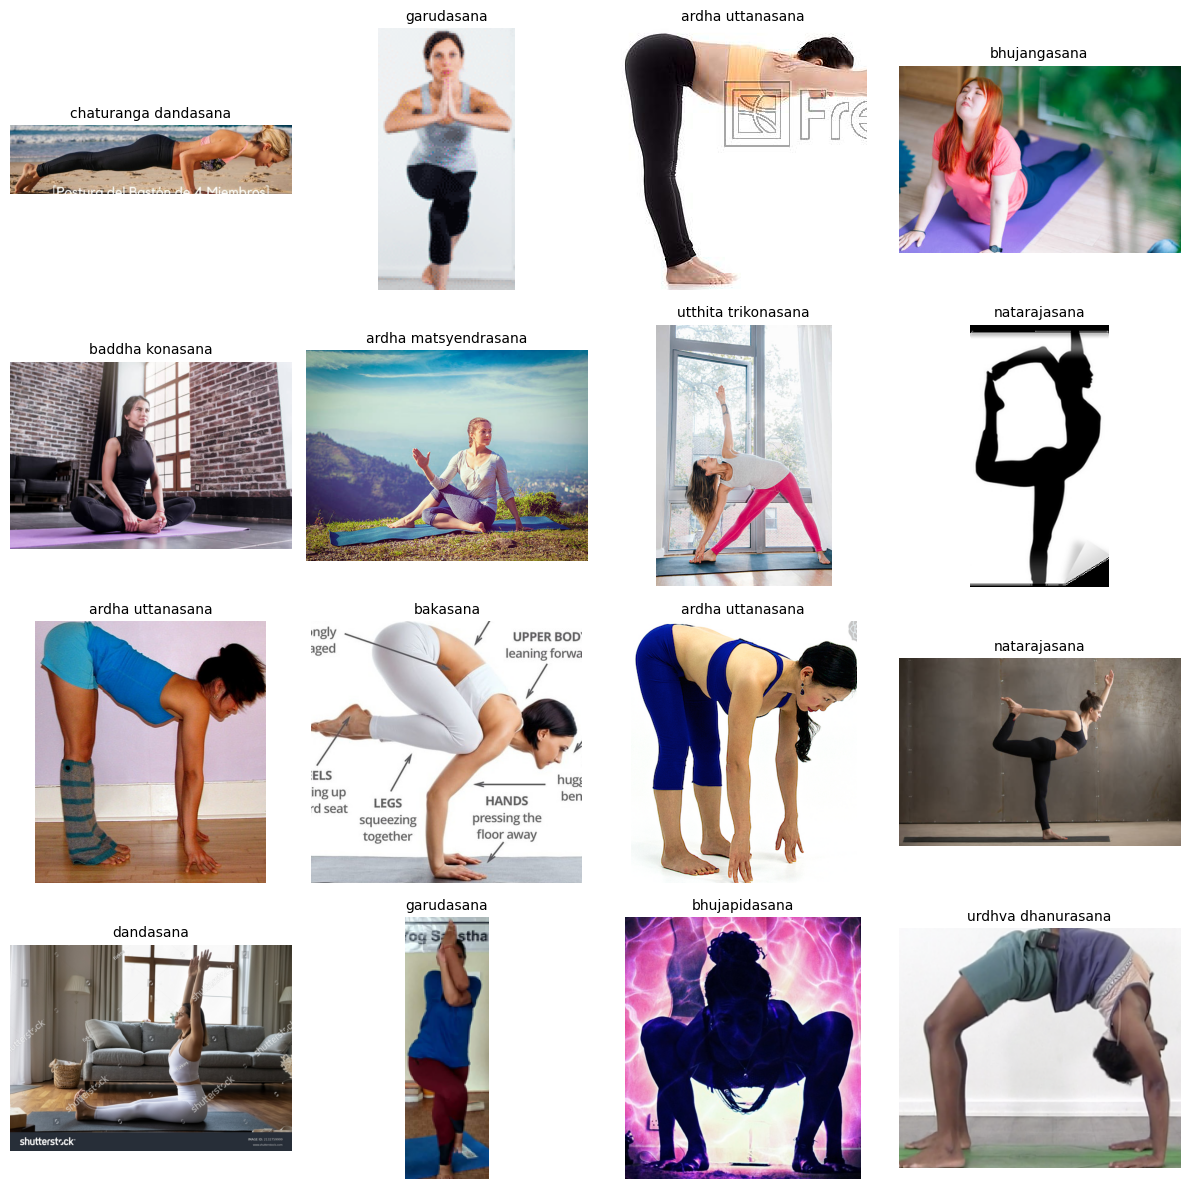

In [11]:
# Get folder names (class labels)
class_labels = os.listdir(image_path)

# Create a list of (image_path, label) pairs
image_files = []
for label in class_labels:
    class_folder = os.path.join(image_path, label)
    if os.path.isdir(class_folder):
        images = os.listdir(class_folder)
        image_files.extend([(os.path.join(class_folder, img), label) for img in images])

# Shuffle and select 25 images
random.shuffle(image_files)
selected_images = image_files[:25]

# Plot images in a 5x5 grid
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    img_path, label = selected_images[i]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display
    ax.imshow(img)
    ax.set_title(label, fontsize=10)
    ax.axis("off")

plt.tight_layout()
plt.show()

## Function to extract keypoints

In [ ]:
!pip install tensorflow tensorflow-hub opencv-python-headless pandas scikit-learn mediapipe


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 21.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.7 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
grpcio-

#### Using MoveNet

In [ ]:
## Loding Movenet and keypoint extraction function

import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2  # Changed to OpenCV for better channel handling
import os
import pandas as pd
from tqdm import tqdm

# Load MoveNet Thunder
movenet = hub.load("https://tfhub.dev/google/movenet/singlepose/thunder/4")
input_size = 256  # Thunder uses 256x256 input

def detect_keypoints(image_path):
    # Read image with OpenCV (automatically drops alpha channel)
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not read image: {image_path}")

    # Convert BGR to RGB and ensure 3 channels
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convert to TensorFlow tensor
    img = tf.convert_to_tensor(img, dtype=tf.uint8)

    # Resize with padding and cast to int32
    img = tf.image.resize_with_pad(img, input_size, input_size)
    img = tf.cast(img, dtype=tf.int32)

    # Add batch dimension
    input_image = tf.expand_dims(img, axis=0)

    # Run model inference
    outputs = movenet.signatures['serving_default'](input_image)
    keypoints = outputs['output_0'].numpy()  # (1, 1, 17, 3)

    # Extract x, y coordinates only
    return keypoints[0, 0, :, :2].flatten()  # (34,) array

In [ ]:
# Keypoint Extraction and Saving in CSV file

data_dir = "Yoga Dataset_40"
pose_data = []

for pose_class in os.listdir(data_dir):
    pose_path = os.path.join(data_dir, pose_class)
    if not os.path.isdir(pose_path):
        continue

    for img_name in tqdm(os.listdir(pose_path), desc=f"Processing {pose_class}"):
        try:
            img_path = os.path.join(pose_path, img_name)
            keypoints = detect_keypoints(img_path)
            pose_data.append([pose_class] + keypoints.tolist())
        except Exception as e:
            print(f"Error processing {img_name}: {e}")

# Create dataframe and save
columns = ['label'] + [f'kp_{i}_{c}' for i in range(17) for c in ['x', 'y']]
df = pd.DataFrame(pose_data, columns=columns)
df.to_csv("yoga_keypoints_moveNet.csv", index=False)

Processing virabhadrasana i:  22%|██▏       | 22/101 [00:02<00:09,  8.04it/s]

Error processing 000076.gif: Could not read image: Yoga Dataset_40/virabhadrasana i/000076.gif


Processing bhujangasana: 100%|██████████| 120/120 [00:11<00:00, 10.47it/s]


#### Using Mediapipe

In [12]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 20.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.7 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
grpcio-

In [13]:
import mediapipe as mp
import cv2
import numpy as np

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(
    static_image_mode=True,       # For single images
    model_complexity=2,           # Highest accuracy
    enable_segmentation=False,
    min_detection_confidence=0.5
)

def detect_keypoints_mediapipe(image_path):
    # Read image with OpenCV
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not read image: {image_path}")

    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Process image with MediaPipe
    results = pose.process(img_rgb)

    if not results.pose_landmarks:
        return np.array([])  # Return empty array if no pose detected

    # Extract and denormalize keypoints
    h, w = img.shape[:2]
    keypoints = []
    for landmark in results.pose_landmarks.landmark:
        # Denormalize coordinates to image dimensions
        x = landmark.x * w
        y = landmark.y * h
        keypoints.extend([x, y])

    return np.array(keypoints)  # Returns (66,) array (33 landmarks * 2 coordinates)


In [14]:
# Keypoint Extraction and Saving in CSV file

data_dir = "Yoga Dataset_40"
pose_data = []

for pose_class in os.listdir(data_dir):
    pose_path = os.path.join(data_dir, pose_class)
    if not os.path.isdir(pose_path):
        continue

    for img_name in tqdm(os.listdir(pose_path), desc=f"Processing {pose_class}"):
        try:
            img_path = os.path.join(pose_path, img_name)
            keypoints = detect_keypoints_mediapipe(img_path)
            pose_data.append([pose_class] + keypoints.tolist())
        except Exception as e:
            print(f"Error processing {img_name}: {e}")

# Create dataframe and save
columns = ['label'] + [f'kp_{i}_{c}' for i in range(33) for c in ['x', 'y']]
df = pd.DataFrame(pose_data, columns=columns)
df.to_csv("yoga_keypoints_mediapipe.csv", index=False)

Processing virabhadrasana i:  24%|██▍       | 24/101 [00:03<00:09,  8.11it/s]

Error processing 000076.gif: Could not read image: Yoga Dataset_40/virabhadrasana i/000076.gif


Processing bhujangasana: 100%|██████████| 120/120 [00:15<00:00,  7.88it/s]


# Model Training

In [22]:
!pip install scikit-learn xgboost

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the CSV
df = pd.read_csv('yoga_keypoints_mediapipe.csv')
print(df.head())
print("Classes:", df['label'].unique())

# Label encode
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

X = df.drop(columns=['label']).values  # shape: (n_samples, 34)
y = df['label'].values  # for sklearn models

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


          label      kp_0_x      kp_0_y      kp_1_x      kp_1_y      kp_2_x  \
0  anjaneyasana  133.330616   93.785012  124.792871   94.981800  124.376339   
1  anjaneyasana  321.997774   99.206907  328.853530   95.943143  329.906724   
2  anjaneyasana  888.004929  194.219097  867.492467  173.557746  866.465271   
3  anjaneyasana  168.911280  161.154415  180.483112  155.060981  182.307789   
4  anjaneyasana  120.207072  106.225795  126.449599  104.223777  127.735605   

       kp_2_y      kp_3_x      kp_3_y      kp_4_x  ...      kp_28_x  \
0   95.596787  124.052555   96.169694  124.542390  ...    28.533147   
1   96.415735  331.026126   96.900430  328.171537  ...   452.080225   
2  174.218292  865.079105  174.589137  863.239467  ...  1225.797236   
3  156.155949  184.076294  157.483362  179.922144  ...    55.732834   
4  105.607575  128.777528  107.191456  124.689550  ...   222.738692   

      kp_28_y     kp_29_x     kp_29_y      kp_30_x     kp_30_y     kp_31_x  \
0  293.517664  271.3

### Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, n_jobs=1, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best RF Params:", grid_rf.best_params_)
print("RF Accuracy:", accuracy_score(y_test, grid_rf.predict(X_test)))


Best RF Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
RF Accuracy: 0.7096474953617811


### SVM

In [28]:
from sklearn.svm import SVC

param_grid_svm = {
    'C': [1, 10, 100],
    'kernel': ['rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=3, n_jobs=1, scoring='accuracy')
grid_svm.fit(X_train, y_train)

print("Best SVM Params:", grid_svm.best_params_)
print("SVM Accuracy:", accuracy_score(y_test, grid_svm.predict(X_test)))


ValueError: 
All the 36 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py", line 197, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1107, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


### K-Nearest Neighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan, 2: Euclidean
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, n_jobs=1, scoring='accuracy')
grid_knn.fit(X_train, y_train)

print("Best KNN Params:", grid_knn.best_params_)
print("KNN Accuracy:", accuracy_score(y_test, grid_knn.predict(X_test)))


ValueError: 
All the 36 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py", line 239, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_base.py", line 478, in _fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1107, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


### XGBoost

In [ ]:
from xgboost import XGBClassifier

param_grid_xgb = {
    'n_estimators': [100, 150],
    'learning_rate': [0.01, 0.1],
    'max_depth': [4, 6]
}

grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), param_grid_xgb, cv=3, n_jobs=1, scoring='accuracy')
grid_xgb.fit(X_train, y_train)

print("Best XGB Params:", grid_xgb.best_params_)
print("XGBoost Accuracy:", accuracy_score(y_test, grid_xgb.predict(X_test)))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:38:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:38:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:38:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:38:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:39:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best XGB Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150}
XGBoost Accuracy: 0.813543599257885


### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'C': [0.1, 1.0, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=3, n_jobs=1, scoring='accuracy')
grid_lr.fit(X_train, y_train)

print("Best LR Params:", grid_lr.best_params_)
print("Logistic Regression Accuracy:", accuracy_score(y_test, grid_lr.predict(X_test)))


ValueError: 
All the 18 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1222, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1107, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [ ]:
print("Best Model:", max([
    ('RF', accuracy_score(y_test, grid_rf.predict(X_test))),
    ('SVM', accuracy_score(y_test, grid_svm.predict(X_test))),
    ('KNN', accuracy_score(y_test, grid_knn.predict(X_test))),
    ('XGB', accuracy_score(y_test, grid_xgb.predict(X_test))),
    ('LR', accuracy_score(y_test, grid_lr.predict(X_test))),
], key=lambda x: x[1]))


Best Model: ('SVM', 0.8413729128014842)


### Performance for Single

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import joblib

print("Accuracy:", accuracy_score(y_test, y_pred))

# Get class probabilities
y_prob = clf.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, y_prob))

#Saving a model
joblib.dump(clf, 'yoga_pose.pkl')
joblib.dump(le, 'label_encoder.pkl')

print("Model Saved")

## Train a Neural Network on the Keypoints

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load MediaPipe-formatted keypoints data
df = pd.read_csv("yoga_keypoints_mediapipe.csv")

# Verify actual features
print("Columns in CSV:", df.columns.tolist())
print("Number of features (excluding label):", len(df.columns) - 1)

# Adjust these based on actual data structure
MEDIAPIPE_LANDMARKS = 33  # Update if different
FEATURES_PER_LANDMARK = 2  # x,y only (common for 2D keypoints)

# Calculate input dimension correctly
input_dim = MEDIAPIPE_LANDMARKS * FEATURES_PER_LANDMARK
print(f"Input dimension: {input_dim}")

# Preprocessing
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# Normalize features (use all columns except 'label')
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(columns=['label']))
y = tf.keras.utils.to_categorical(df['label'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=df['label'], random_state=42
)

# Update model input shape
model = Sequential([
    Dense(256, activation='relu', input_shape=(input_dim,)),  # Now matches your data
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y.shape[1], activation='softmax')
])

# Configure learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.96
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train with early stopping
history = model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=32,
    validation_split=0.2,
    # callbacks=[EarlyStopping(patience=60, restore_best_weights=True)]
)


Columns in CSV: ['label', 'kp_0_x', 'kp_0_y', 'kp_1_x', 'kp_1_y', 'kp_2_x', 'kp_2_y', 'kp_3_x', 'kp_3_y', 'kp_4_x', 'kp_4_y', 'kp_5_x', 'kp_5_y', 'kp_6_x', 'kp_6_y', 'kp_7_x', 'kp_7_y', 'kp_8_x', 'kp_8_y', 'kp_9_x', 'kp_9_y', 'kp_10_x', 'kp_10_y', 'kp_11_x', 'kp_11_y', 'kp_12_x', 'kp_12_y', 'kp_13_x', 'kp_13_y', 'kp_14_x', 'kp_14_y', 'kp_15_x', 'kp_15_y', 'kp_16_x', 'kp_16_y', 'kp_17_x', 'kp_17_y', 'kp_18_x', 'kp_18_y', 'kp_19_x', 'kp_19_y', 'kp_20_x', 'kp_20_y', 'kp_21_x', 'kp_21_y', 'kp_22_x', 'kp_22_y', 'kp_23_x', 'kp_23_y', 'kp_24_x', 'kp_24_y', 'kp_25_x', 'kp_25_y', 'kp_26_x', 'kp_26_y', 'kp_27_x', 'kp_27_y', 'kp_28_x', 'kp_28_y', 'kp_29_x', 'kp_29_y', 'kp_30_x', 'kp_30_y', 'kp_31_x', 'kp_31_y', 'kp_32_x', 'kp_32_y']
Number of features (excluding label): 66
Input dimension: 66


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.0253 - loss: nan - val_accuracy: 0.0261 - val_loss: nan
Epoch 2/300
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0221 - loss: nan - val_accuracy: 0.0261 - val_loss: nan
Epoch 3/300
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0232 - loss: nan - val_accuracy: 0.0261 - val_loss: nan
Epoch 4/300
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0262 - loss: nan - val_accuracy: 0.0261 - val_loss: nan
Epoch 5/300
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0229 - loss: nan - val_accuracy: 0.0261 - val_loss: nan
Epoch 6/300
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0215 - loss: nan - val_accuracy: 0.0261 - val_loss: nan
Epoch 7/300
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0263 - loss: nan - val_accuracy: 0.0261 - val_loss: nan
Epoch 8/300
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0260 - loss: nan - val_accuracy: 0.0261 - val_loss: nan
Epoch 9/300
87/87 ━━━━━━━━━━━━━

KeyboardInterrupt: 

### Evaluation and Plotting

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0190 - loss: nan

Test Accuracy: 2.43%


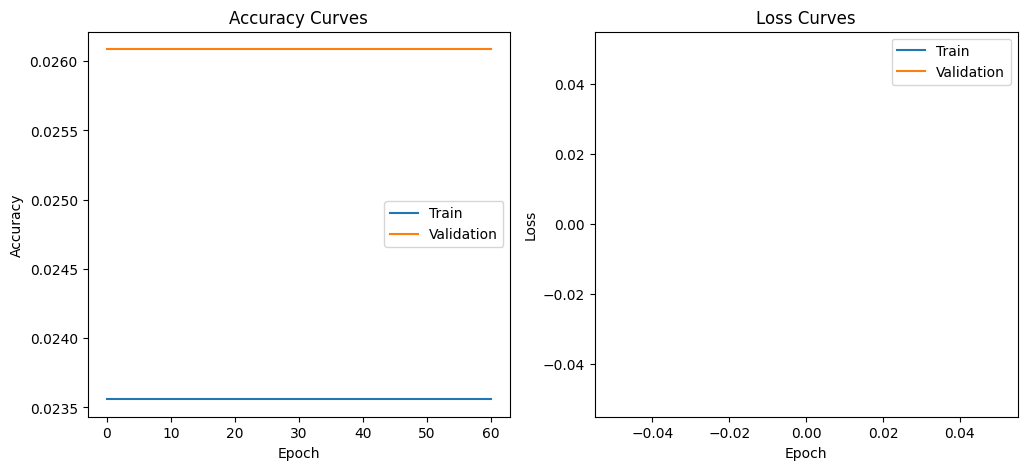

NameError: name 'joblib' is not defined

In [36]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

# Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save artifacts
model.save("mediapipe_yoga_model.h5")
joblib.dump(scaler, "mediapipe_scaler.pkl")
joblib.dump(le, "mediapipe_label_encoder.pkl")

### Better training with Optimization

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import joblib
import os

# --- Load and preprocess data ---
df = pd.read_csv("yoga_keypoints_moveNet.csv")  # Shape: [n_samples, 51], 17 keypoints * 3
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

X = df.drop(columns=["label"]).values  # shape: (n_samples, 51)
y = tf.keras.utils.to_categorical(df['label'])  # one-hot encoded

# Normalize features (important for NN convergence)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save scaler and encoder for deployment
os.makedirs("artifacts", exist_ok=True)
joblib.dump(scaler, "artifacts/keypoint_scaler.pkl")
joblib.dump(label_encoder, "artifacts/label_encoder.pkl")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=df['label'], random_state=42
)

# Handle class imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df['label']),
    y=df['label']
)
class_weights = dict(enumerate(class_weights))

# --- Model definition ---
def build_model(input_dim, num_classes):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_dim,), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),

        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        BatchNormalization(),
        Dropout(0.4),

        Dense(num_classes, activation='softmax')
    ])
    return model


model = build_model(input_dim=X_train.shape[1], num_classes=y_train.shape[1])

# --- Optimizer and Learning Rate Schedule ---
def lr_scheduler(epoch, lr):
    return lr * 0.95 if epoch > 50 else lr

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# --- Callbacks ---
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=60,
    restore_best_weights=True
)
lr_callback = LearningRateScheduler(lr_scheduler)

# --- Training ---
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[lr_callback],
    class_weight=class_weights,
    verbose=2
)

# --- Evaluation ---
y_pred = model.predict(X_test)
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=label_encoder.classes_))

# --- Save Model ---
model.save("artifacts/yoga_pose_model.h5")
model.save("artifacts/yoga_pose_model.keras")

print("✅ Model, scaler, and label encoder saved in /artifacts folder.")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
87/87 - 4s - 51ms/step - accuracy: 0.1711 - loss: 3.6134 - precision: 0.3868 - recall: 0.0402 - val_accuracy: 0.4928 - val_loss: 2.8472 - val_precision: 1.0000 - val_recall: 0.0043 - learning_rate: 1.0000e-03
Epoch 2/200
87/87 - 1s - 7ms/step - accuracy: 0.3606 - loss: 2.4703 - precision: 0.6203 - recall: 0.1261 - val_accuracy: 0.6304 - val_loss: 2.1566 - val_precision: 0.9388 - val_recall: 0.0667 - learning_rate: 1.0000e-03
Epoch 3/200
87/87 - 1s - 6ms/step - accuracy: 0.4744 - loss: 2.0315 - precision: 0.7213 - recall: 0.2298 - val_accuracy: 0.7043 - val_loss: 1.6596 - val_precision: 0.9688 - val_recall: 0.2246 - learning_rate: 1.0000e-03
Epoch 4/200
87/87 - 1s - 7ms/step - accuracy: 0.5408 - loss: 1.7932 - precision: 0.7609 - recall: 0.3171 - val_accuracy: 0.7406 - val_loss: 1.3641 - val_precision: 0.9325 - val_recall: 0.4203 - learning_rate: 1.0000e-03
Epoch 5/200
87/87 - 1s - 7ms/step - accuracy: 0.6013 - loss: 1.6093 - precision: 0.7941 - recall: 0.3885 - val_accuracy

                        precision    recall  f1-score   support

  Adho Mukha Svanasana       0.95      1.00      0.98        21
  Adho Mukha Vrksasana       0.82      0.86      0.84        21
       ananda balasana       0.95      0.95      0.95        19
          anjaneyasana       0.80      0.95      0.87        21
     ardha chandrasana       1.00      0.90      0.95        21
  ardha matsyendrasana       0.91      0.95      0.93        22
      ardha uttanasana       0.80      0.76      0.78        21
         astavakrasana       0.92      0.96      0.94        23
       baddha konasana       1.00      0.80      0.89        20
              bakasana       1.00      0.86      0.92        21
              balasana       0.86      0.86      0.86        21
             bhekasana       0.95      1.00      0.98        21
          bhujangasana       0.83      0.42      0.56        24
         bhujapidasana       0.86      0.86      0.86        21
            bitilasana       0.91      

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8980 - loss: 0.4721 - precision: 0.9147 - recall: 0.8874
Test Accuracy: 88.76% | Loss: 0.5510 | Precision: 0.90 | Recall: 0.87


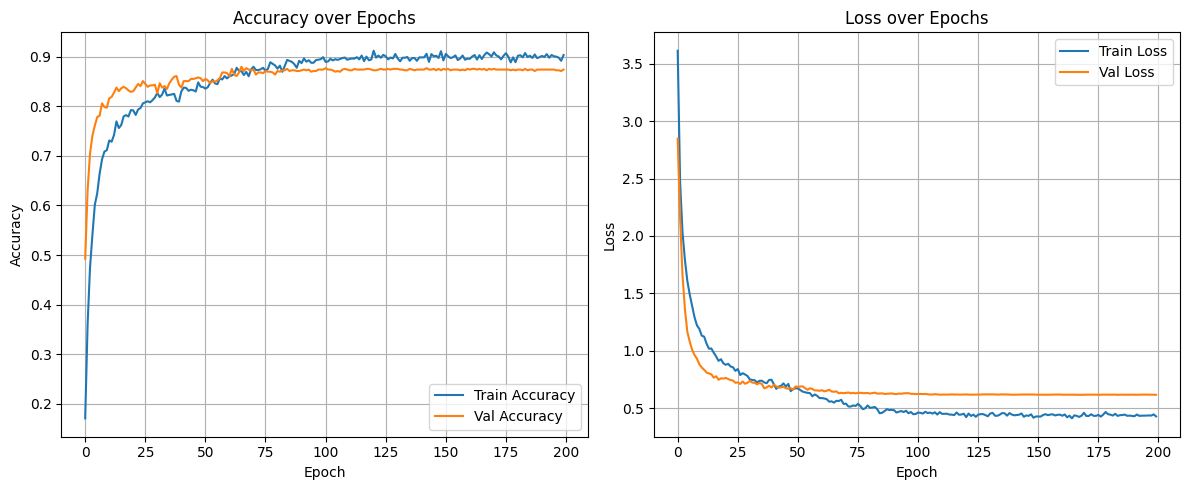

In [ ]:
import matplotlib.pyplot as plt

results = model.evaluate(X_test, y_test)
loss, acc, precision, recall = results
print(f"Test Accuracy: {acc*100:.2f}% | Loss: {loss:.4f} | Precision: {precision:.2f} | Recall: {recall:.2f}")


# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()




## Autotune Keras Model for best hyperparameter

In [ ]:
!pip install -q keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import keras_tuner as kt

# 👉 Assume X and y are already defined and preprocessed
# For example:
# - X: shape (num_samples, num_features)
# - y: one-hot or categorical labels

# STEP 1: Convert one-hot labels (if needed) to integer labels
if len(y.shape) > 1 and y.shape[1] > 1:
    y = np.argmax(y, axis=1)

# STEP 2: Ensure y is integer-encoded
y = np.array(y).astype(np.int32)

# STEP 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# STEP 4: Get number of classes
num_classes = len(np.unique(y_train))

# STEP 5: Define model builder for Keras Tuner
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))

    for i in range(hp.Int("num_layers", 1, 3)):
        model.add(tf.keras.layers.Dense(
            units=hp.Int(f"units_{i}", min_value=64, max_value=512, step=64),
            activation='relu',
            kernel_regularizer=tf.keras.regularizers.l2(0.001)
        ))
        model.add(tf.keras.layers.Dropout(
            rate=hp.Float(f"dropout_{i}", min_value=0.1, max_value=0.5, step=0.1)
        ))

    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float("lr", 1e-4, 1e-2, sampling="log")
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# STEP 6: Setup tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    overwrite=True,
    directory='tuner_dir',
    project_name='pose_tuning'
)

# STEP 7: Run the search
tuner.search(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
)

# STEP 8: Get best model and evaluate
best_model = tuner.get_best_models(num_models=1)[0]
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Trial 10 Complete [00h 00m 44s]
val_accuracy: 0.7956521511077881

Best val_accuracy So Far: 0.8318840861320496
Total elapsed time: 00h 06m 04s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8439 - loss: 0.8804
Test Accuracy: 0.8262


KeyboardInterrupt: 

In [ ]:
from google.colab import files

files.download("yoga_pose_nn.h5")
files.download("label_encoder.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>